#Lifelines

In [98]:
!pip install lifelines

# Importing necessary libraries and loading data

In [99]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# lifelines for survival analysis (Kaplan-Meier estimator)
from lifelines import KaplanMeierFitter



In [100]:
# Loading the data and reading it in pandas Dataframe
df = pd.read_excel('/content/ASA Group 3 Unique Random Sample.xlsx')

In [101]:
df.head()

,Sl No.,customerID,genderword,SeniorCitizen,PartnerWord,DependentsW,tenure,PhoneServicew,MultipleLinesw,PaperlessBillingW,...,DeviceProtection_A,TechSupport_A,StreamingTV_A,StreamingMovies_A,InternetService_A,Contract_A,PaymentMethod_A,MonthlyCharges,TotalCharges,Cust_Calls
0,2043,0067-DKWBL,Male,YES,No,No,2,Yes,No,Yes,...,No,No,No,No,DSL,Month-to-month,Electronic check,49.25,91.10,6
1,10377,4990-ALDGW,Male,NO,No,No,57,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No,Two year,Mailed check,20.75,1118.80,2
2,8289,4625-XMOYM,Female,NO,Yes,Yes,72,Yes,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,No,Two year,Bank transfer (automatic),26.25,1988.05,2
3,5147,5678-VFNEQ,Female,NO,Yes,No,71,Yes,Yes,Yes,...,Yes,No,Yes,Yes,Fiber optic,One year,Credit card (automatic),104.10,7412.25,4
4,4260,4109-CYRBD,Male,YES,Yes,No,29,Yes,Yes,Yes,...,No,No,No,No,DSL,Month-to-month,Electronic check,51.60,1442.00,1


# Exploratory Data Analysis (EDA)

In [102]:
# Analysing the data through EDA

print("\nDataset Shape:",df.shape)
print("\nDataset Info:")
df.info()



Dataset Shape: (5000, 23)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sl No.              5000 non-null   int64  
 1   customerID          5000 non-null   object 
 2   genderword          5000 non-null   object 
 3   SeniorCitizen       5000 non-null   object 
 4   PartnerWord         5000 non-null   object 
 5   DependentsW         5000 non-null   object 
 6   tenure              5000 non-null   int64  
 7   PhoneServicew       5000 non-null   object 
 8   MultipleLinesw      5000 non-null   object 
 9   PaperlessBillingW   5000 non-null   object 
 10  Churnwords          5000 non-null   object 
 11  OnlineSecurityW     5000 non-null   object 
 12  OnlineBackupW       5000 non-null   object 
 13  DeviceProtection_A  5000 non-null   object 
 14  TechSupport_A       5000 non-null   object 
 15  StreamingTV_A

In [103]:
# Checking statistics for numeric variables
print("\nSummary Statistics for numeric variables:")
df.describe()


Summary Statistics for numeric variables:


,Sl No.,tenure,MonthlyCharges,TotalCharges,Cust_Calls
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000
mean,5377.37740,27.45940,67.855430,2020.689130,1.675600
std,3123.26844,23.88155,28.753125,2155.128019,1.301193
min,1.00000,0.00000,18.250000,18.800000,0.000000
25%,2641.75000,5.00000,45.800000,267.350000,1.000000
50%,5397.50000,21.00000,74.400000,1145.875000,1.000000
75%,8131.75000,48.00000,90.862500,3266.000000,2.000000
max,10777.00000,72.00000,118.750000,8684.800000,8.000000


In [104]:
# Check for missing values , sum of nulls per column
print("\nmissing values per column:")
print(df.isnull().sum())


missing values per column:
Sl No.                0
customerID            0
genderword            0
SeniorCitizen         0
PartnerWord           0
DependentsW           0
tenure                0
PhoneServicew         0
MultipleLinesw        0
PaperlessBillingW     0
Churnwords            0
OnlineSecurityW       0
OnlineBackupW         0
DeviceProtection_A    0
TechSupport_A         0
StreamingTV_A         0
StreamingMovies_A     0
InternetService_A     0
Contract_A            0
PaymentMethod_A       0
MonthlyCharges        0
TotalCharges          0
Cust_Calls            0
dtype: int64


In [105]:
# Checking the unique values in each categorical column
obj_cols = df.select_dtypes(include='object')

for col in obj_cols.columns:
    print(f"{col} → {df[col].nunique()} unique values")

customerID → 3348 unique values
genderword → 2 unique values
SeniorCitizen → 2 unique values
PartnerWord → 2 unique values
DependentsW → 2 unique values
PhoneServicew → 2 unique values
MultipleLinesw → 3 unique values
PaperlessBillingW → 2 unique values
Churnwords → 2 unique values
OnlineSecurityW → 3 unique values
OnlineBackupW → 3 unique values
DeviceProtection_A → 3 unique values
TechSupport_A → 3 unique values
StreamingTV_A → 3 unique values
StreamingMovies_A → 3 unique values
InternetService_A → 3 unique values
Contract_A → 3 unique values
PaymentMethod_A → 4 unique values


In [106]:
# Value count for categorical variable
# and Normalized them to percentages

print("\nValue count for Gender:")
print(df['genderword'].value_counts(normalize=True))

print("\nValue counts for Churn:")
print(df['Churnwords'].value_counts(normalize=True))

print("\nvalue Counts for SeniorCitizen:")
print(df['SeniorCitizen'].value_counts(normalize=True))

print("\nValue counts for Partner:")
print(df['PartnerWord'].value_counts(normalize=True))


Value count for Gender:
genderword
Male      0.5016
Female    0.4984
Name: proportion, dtype: float64

Value counts for Churn:
Churnwords
Yes    0.5196
No     0.4804
Name: proportion, dtype: float64

value Counts for SeniorCitizen:
SeniorCitizen
NO     0.802
YES    0.198
Name: proportion, dtype: float64

Value counts for Partner:
PartnerWord
No     0.5648
Yes    0.4352
Name: proportion, dtype: float64


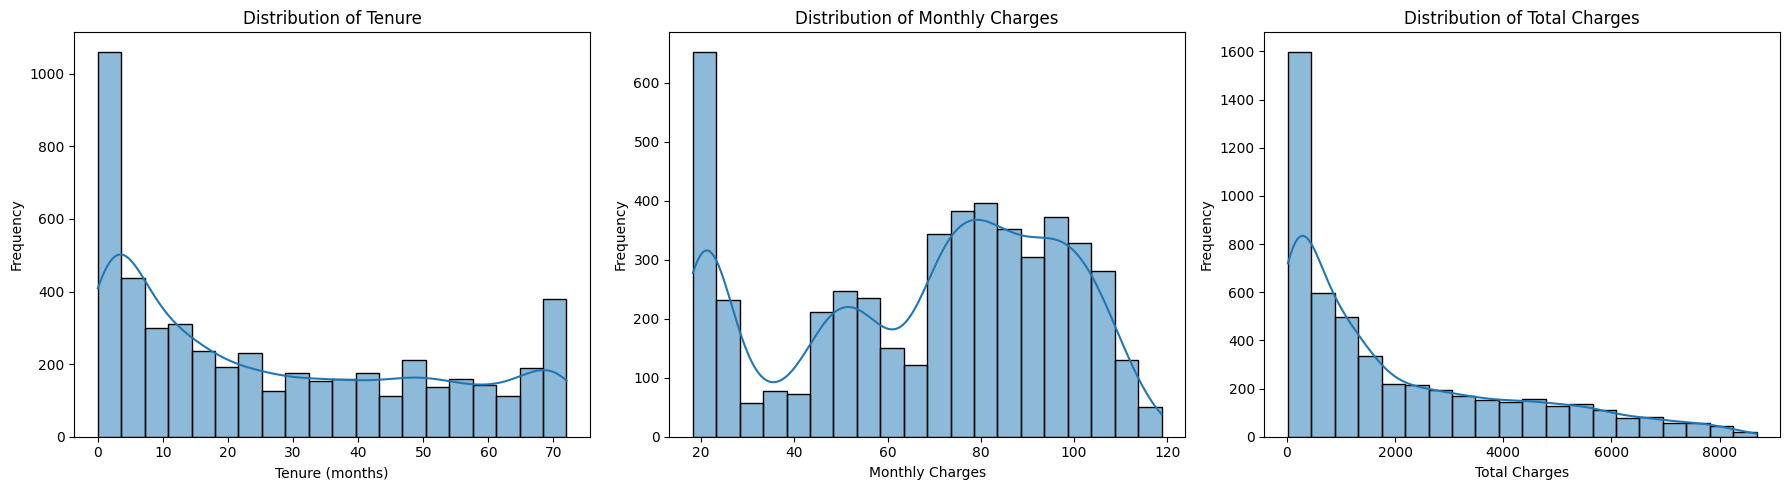

In [107]:
# Visualization of the data

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 plots

# Distribution of Tenure
sns.histplot(data=df, x='tenure', bins=20, kde=True, ax=axes[0]) # Pass the DataFrame and specify x
axes[0].set_title('Distribution of Tenure')
axes[0].set_xlabel('Tenure (months)')
axes[0].set_ylabel('Frequency')

# Distribution of Monthly Charges
sns.histplot(data=df, x='MonthlyCharges', bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Monthly Charges')
axes[1].set_xlabel('Monthly Charges')
axes[1].set_ylabel('Frequency')

# Distribution of Total Charges
sns.histplot(data=df, x='TotalCharges', bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Total Charges')
axes[2].set_xlabel('Total Charges')
axes[2].set_ylabel('Frequency')

plt.tight_layout()

Text(0, 0.5, 'Monthly Charges')

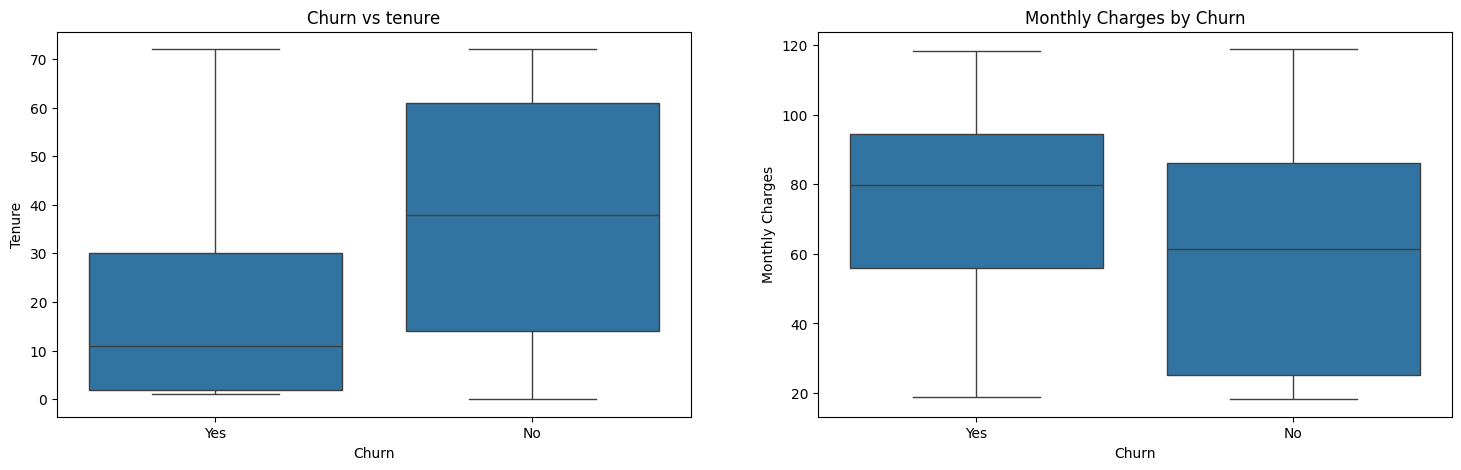

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))  # 1 row, 3 plots

# Boxplot - Churn vs tenure
sns.boxplot(x='Churnwords', y='tenure', data=df, ax=axes[0])
axes[0].set_title('Churn vs tenure')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Tenure')


# Boxplot - monthly charges by churn
sns.boxplot(x='Churnwords', y='MonthlyCharges', data=df, ax=axes[1])
axes[1].set_title('Monthly Charges by Churn')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Monthly Charges')




In [109]:
#crosstab : Churn by contract

print("\nChurn by Contract:")
print(pd.crosstab(df['Churnwords'],df['Contract_A'], normalize='index'))


Churn by Contract:
Contract_A  Month-to-month  One year  Two year
Churnwords                                    
No                0.429642  0.238551  0.331807
Yes               0.891840  0.083911  0.024249


# ---------------------
## **Preparing data for Survival analysis**
# ---------------------

In [110]:
# Prepare data for Survival Analysis
# Kaplan-Meier requires : duration(tenure) , event_observed(1 if churned, 0 if not)
# Map Churnword : "Yes" -> 1(event) , "No" -> 0 (censored)

df['event_observed'] = df['Churnwords'].map({'Yes': 1, 'No': 0})

#ensure no missing in tenure or event
df = df.dropna(subset=['tenure', 'event_observed'])

# Display a sample to check if the mapping was successful
display(df[['Churnwords', 'event_observed']].head())

,Churnwords,event_observed
0,Yes,1
1,No,0
2,No,0
3,No,0
4,No,0


# ---------------------
## **Q5: Overall Survival Curve using Kaplan-Meier**
# ---------------------

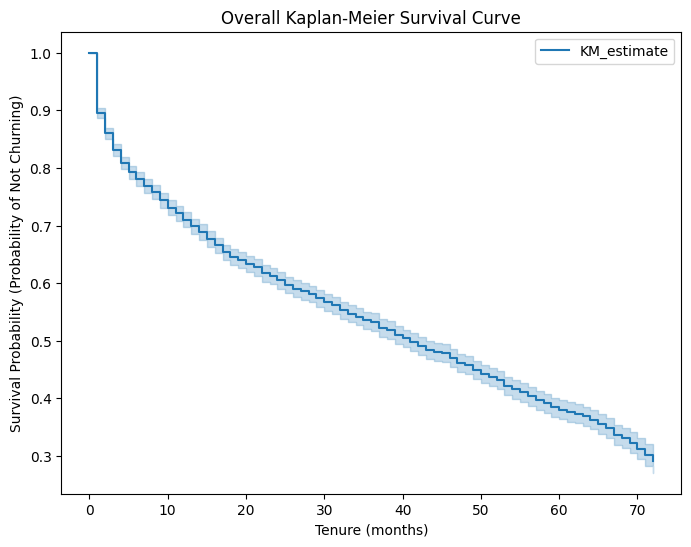

In [111]:
# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter() # Create an instance of the class

# fit the data : duration = tenure, event_observed = chrun event
kmf.fit(durations=df['tenure'], event_observed=df['event_observed'])


# Plot the survival curve
plt.figure(figsize=(8,6))
kmf.plot_survival_function()
plt.title('Overall Kaplan-Meier Survival Curve')
plt.xlabel('Tenure (months)')
plt.ylabel('Survival Probability (Probability of Not Churning)')
plt.show()

# ---------------------
# Q6: Survival curves for different categories of customers
# ---------------------


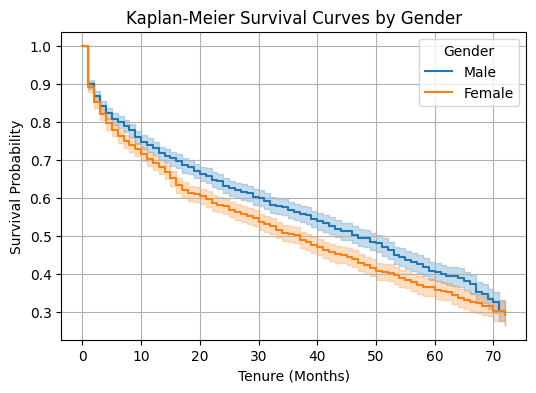

In [112]:
# Survival Curves by Gender

plt.figure(figsize=(6,4))

# masking and fitting genderword
for gender in df['genderword'].unique():
    mask = df['genderword'] == gender
    kmf.fit(df.loc[mask, 'tenure'], df.loc[mask, 'event_observed'], label=str(gender))
    kmf.plot()

plt.title('Kaplan-Meier Survival Curves by Gender')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

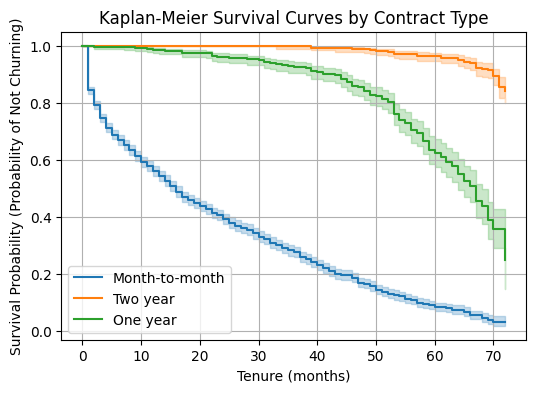

In [113]:
# Compare survival curves by Contract Type

# Get the unique contract types
contract_types = df['Contract_A'].unique()

plt.figure(figsize=(6, 4))

# Fit and plot Kaplan-Meier curves for each contract type
for contract_type in contract_types:
    # Subset the data for the current contract type
    subset_df = df[df['Contract_A'] == contract_type]

    # Initialize and fit the KaplanMeierFitter for the subset
    kmf = KaplanMeierFitter()
    kmf.fit(durations=subset_df['tenure'], event_observed=subset_df['event_observed'], label=contract_type)

    # Plot the survival function
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves by Contract Type')
plt.xlabel('Tenure (months)')
plt.ylabel('Survival Probability (Probability of Not Churning)')
plt.legend()
plt.grid(True)
plt.show()

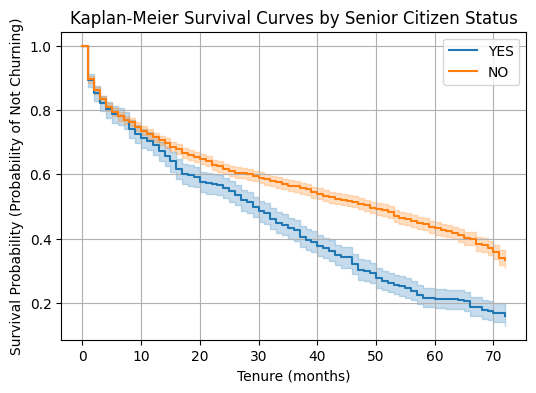

In [114]:
# Compare survival curves by Senior Citizen status

senior_status = df['SeniorCitizen'].unique()

plt.figure(figsize=(6, 4))

for status in senior_status:
    subset_df = df[df['SeniorCitizen'] == status]
    kmf = KaplanMeierFitter()
    kmf.fit(durations=subset_df['tenure'], event_observed=subset_df['event_observed'], label=status)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves by Senior Citizen Status')
plt.xlabel('Tenure (months)')
plt.ylabel('Survival Probability (Probability of Not Churning)')
plt.legend()
plt.grid(True)
plt.show()



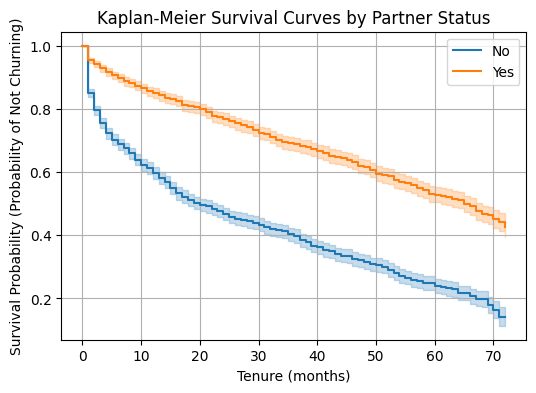

In [115]:
# Compare survival curves by Partner status

partner_status = df['PartnerWord'].unique()

plt.figure(figsize=(6, 4))

for status in partner_status:
    subset_df = df[df['PartnerWord'] == status]
    kmf = KaplanMeierFitter()
    kmf.fit(durations=subset_df['tenure'], event_observed=subset_df['event_observed'], label=status)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves by Partner Status')
plt.xlabel('Tenure (months)')
plt.ylabel('Survival Probability (Probability of Not Churning)')
plt.legend()
plt.grid(True)
plt.show()

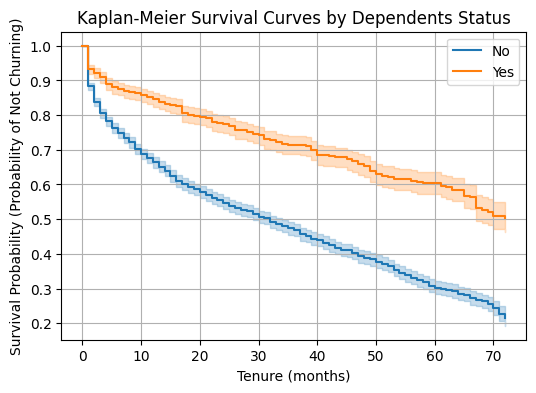

In [117]:
# Compare survival curves by Dependents status

dependents_status = df['DependentsW'].unique()

plt.figure(figsize=(6, 4))

for status in dependents_status:
    subset_df = df[df['DependentsW'] == status]
    kmf = KaplanMeierFitter()
    kmf.fit(durations=subset_df['tenure'], event_observed=subset_df['event_observed'], label=status)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves by Dependents Status')
plt.xlabel('Tenure (months)')
plt.ylabel('Survival Probability (Probability of Not Churning)')
plt.legend()
plt.grid(True)
plt.show()